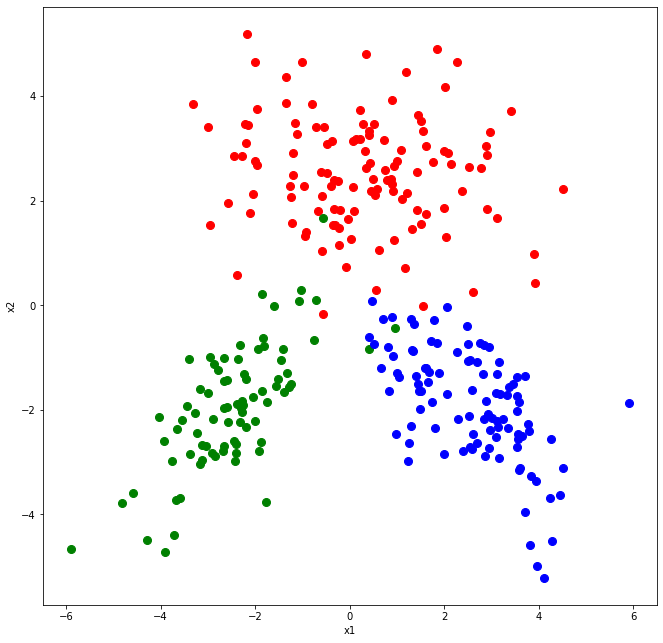

Sample Mean Value Estimation Intervals: 

1st class: 

The sample mean value estimation interval for class1 is:
 [0.26563078 2.52716835]

2nd class: 

The sample mean value estimation interval for class2 is:
 [-2.47809683 -1.95300192]

3rd class: 

The sample mean value estimation interval for class3 is:
 [ 2.56009664 -1.90556717]

Sample Mean Est: 

[[ 0.26563078  2.52716835]
 [-2.47809683 -1.95300192]
 [ 2.56009664 -1.90556717]]

Sample Covariance Matrices: 

Covariance Matrix for the first class:
 [[ 2.66148669 -0.23424653]
 [-0.23424653  1.16477455]]

Covariance Matrix for the second class:
 [[1.19581994 0.92481706]
 [0.92481706 1.39635535]]

Covariance Matrix for the third class:
 [[ 1.23731467 -0.70749062]
 [-0.70749062  1.13882277]]

Covariance Matrix Estimations: 

[[[ 2.66148669 -0.23424653]
  [-0.23424653  1.16477455]]

 [[ 1.19581994  0.92481706]
  [ 0.92481706  1.39635535]]

 [[ 1.23731467 -0.70749062]
  [-0.70749062  1.13882277]]]

Prior Probability Estimations: 

[0.4, 0.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

np.random.seed(1)


#Mean data generation
firstMean= [+0.0, +2.5]
secondMean= [-2.5, -2.0]
thirdMean= [+2.5, -2.0]

#covariance data generation
firstCovMat= [[+3.2, +0.0],
              [+0.0, +1.2]]

secondCovMat= [[+1.2, +0.8],
               [+0.8, +1.2]]

thirdCovMat= [[+1.2, -0.8],
              [-0.8, +1.2]]

#the generation of the size data
firstSize= 120
secondSize= 80
thirdSize= 100


mean_vals_of_the_class = np.array([firstMean,secondMean,thirdMean]) #the concatination of the mean datas (creating an array including the mean datas/parameters)

covariance_vals_of_the_class = np.array([firstCovMat,secondCovMat,thirdCovMat]) #the concatination of the covariance matrix datas (creating an array including the covariance matrix datas/parameters)

sizeValsOfTheClass = np.array([firstSize,secondSize,thirdSize]) #the concatination of the size datas (creating an array including class size datas/parameters)

S = 3
randP1 = np.random.multivariate_normal(mean_vals_of_the_class[0,:], covariance_vals_of_the_class[0,:,:], sizeValsOfTheClass[0]) 
randP2 = np.random.multivariate_normal(mean_vals_of_the_class[1,:], covariance_vals_of_the_class[1,:,:], sizeValsOfTheClass[1])
randP3 = np.random.multivariate_normal(mean_vals_of_the_class[2,:], covariance_vals_of_the_class[2,:,:], sizeValsOfTheClass[2])
print()
stackOfRandomPoints= np.vstack((randP1, randP2, randP3)) #vertically stacking the created random points 

conc = np.concatenate((np.repeat(1, sizeValsOfTheClass[0]), np.repeat(2, sizeValsOfTheClass[1]), np.repeat(3, sizeValsOfTheClass[2]))) #Generating the labels of the random samples
str1= "x1"
str2= "x2"
red= "r."
green= "g."
blue= "b."
plt.figure(figsize= (11, 11))
plt.plot(randP1[:,0], randP1[:,1], red, markersize = 16) #Plotting the red data points
plt.plot(randP2[:,0], randP2[:,1], green, markersize = 16)#Plotting the green data points
plt.plot(randP3[:,0], randP3[:,1], blue, markersize = 16)#Plotting the blue data points

plt.xlabel(str1)
plt.ylabel(str2) 
plt.show() 

def findMaximum(arr): #This method finds the largest value in an array and returns this value.
    maximumNumber=arr[0]
    l= len(arr)
    for i in range(l):
        if arr[i]>maximumNumber:
            maximumNumber=arr[i]
    return maximumNumber


max_val= findMaximum(conc)
sample_mean_value_estimation_interval = [np.mean(stackOfRandomPoints[conc == (num + 1)], axis=0) for num in range(max_val)] #mean estimation

mean_1= sample_mean_value_estimation_interval[0]
mean_2= sample_mean_value_estimation_interval[1]
mean_3= sample_mean_value_estimation_interval[2]

print("Sample Mean Value Estimation Intervals: \n")
print("1st class: \n")
print("The sample mean value estimation interval for class1 is:\n "+str(mean_1)+"\n")
print("2nd class: \n")
print("The sample mean value estimation interval for class2 is:\n "+str(mean_2)+"\n")
print("3rd class: \n")
print("The sample mean value estimation interval for class3 is:\n "+str(mean_3)+"\n")

print("Sample Mean Est: \n")
m= np.array([mean_1,mean_2,mean_3]) #creating an array including the mean estimation datas
print(m)


exCovarianceMatrices = [np.matmul(np.transpose(stackOfRandomPoints[conc == (num2+1)] - sample_mean_value_estimation_interval[num2]),stackOfRandomPoints[conc == (num2+1)] - 
                         sample_mean_value_estimation_interval[num2])/sizeValsOfTheClass[num2] for num2 in range(max_val)] #Estimation of the covariance matrices


firstMat= exCovarianceMatrices[0]
secondMat= exCovarianceMatrices[1]
thirdMat= exCovarianceMatrices[2]

print()
print("Sample Covariance Matrices: \n")  
print("Covariance Matrix for the first class:\n "+str(firstMat)+"\n")
print("Covariance Matrix for the second class:\n "+str(secondMat)+"\n")
print("Covariance Matrix for the third class:\n "+str(thirdMat)+"\n")


print("Covariance Matrix Estimations: \n")
c= np.array([firstMat,secondMat,thirdMat]) #Creating an array which includes the covariance matrix estimations
print(c)

print()
print("Prior Probability Estimations: \n")
class_prior_probs = [np.mean(conc == (my_num + 1)) for my_num in range(max_val)] #Class prior probability estimation
print(class_prior_probs)



def findMaxValIndex(arr): # This method finds the index of the maximum value in an array and returns that index.
    maxVal= arr[0]
    maxValInd= 0
    l= len(arr)
    for i in range(l):
        if arr[i]>maxVal:
            maxValInd= i
            maxVal= arr[i]
    return maxValInd


concPred = []

rowNmb= len(stackOfRandomPoints)

const= (-0.5)*S*math.log(2*math.pi)

#calculating the score values and generating a prediction data set with labels.
for d in range(rowNmb):
    scrVals = [const-0.5*math.log(np.linalg.det(exCovarianceMatrices[num3])) -0.5 * np.matmul(np.matmul(stackOfRandomPoints[d] 
            - sample_mean_value_estimation_interval[num3], np.linalg.inv(exCovarianceMatrices[num3])), stackOfRandomPoints[d] - np.transpose(sample_mean_value_estimation_interval[num3])) + math.log(class_prior_probs[num3]) for num3 in range(max_val)] #score calculation
    classNums= 1+findMaxValIndex(scrVals)
    concPred.append(classNums) 

concPred = np.array(concPred)
print()


cnf_mat = pd.crosstab(concPred, conc, rownames = ['y_pred'], colnames = ['y_truth']) #By using crosstab method of pandas, I created a confusion matrix. 
print("The Confusion Matrix: \n")
print()
print(cnf_mat)

lowBound= -6
upBound=  +6

intrvlForX1 = np.linspace(lowBound, upBound, 1201) #generating data points between lowBound and upBound(with same difference between data points)
intrvlForX2 = np.linspace(lowBound, upBound, 1201) #generating data points between lowBound and upBound(with same difference between data points)
gridOfX1, gridOfX2 = np.meshgrid(intrvlForX1, intrvlForX2)
lng1= len(intrvlForX1)
lng2= len(intrvlForX2)



discrVals = np.zeros((lng1,lng2, S)) #initialization of discriminant values



for l1 in range(lng1):
    for l2 in range(lng2):
        discrVals[l1][l2][:] = [const -0.5*math.log(np.linalg.det(exCovarianceMatrices[my_number])) -0.5 * np.matmul(np.matmul(np.array([intrvlForX1[l1], intrvlForX2[l2]]).reshape(1,2) 
            - sample_mean_value_estimation_interval[my_number], np.linalg.inv(exCovarianceMatrices[my_number])), (np.array([intrvlForX1[l1], intrvlForX2[l2]]).reshape(1,2) 
            - sample_mean_value_estimation_interval[my_number]).T) + math.log(class_prior_probs[my_number]) for my_number in range(max_val)]

v1 = discrVals[:,:,0]
v2 = discrVals[:,:,1]
v3 = discrVals[:,:,2]

v1[(v1 < v2) & (v1 < v3)] = np.nan
v2[(v2 < v1) & (v2 < v3)] = np.nan
v3[(v3 < v1) & (v3 < v2)] = np.nan

plt.figure(figsize = (11, 11))
plt.plot(stackOfRandomPoints[conc == 1, 0], stackOfRandomPoints[conc == 1, 1], red, markersize = 13)
plt.plot(stackOfRandomPoints[conc == 2, 0], stackOfRandomPoints[conc == 2, 1], green, markersize = 13)
plt.plot(stackOfRandomPoints[conc == 3, 0], stackOfRandomPoints[conc == 3, 1], blue, markersize = 13)
plt.plot(stackOfRandomPoints[concPred != conc, 0], stackOfRandomPoints[concPred != conc, 1], "ko", markersize = 15, fillstyle = "none")

df1= v1-v2
df2= v1-v3
df3= v2-v3


trn1= np.transpose((df1))
trn2= np.transpose((df2))
trn3= np.transpose((df3))

blackColor= "k"

#Usage of the plt.contour() functions to draw the decision boundaries.
plt.contour(gridOfX1, gridOfX2, trn1, levels = 0, colors = blackColor) 
plt.contour(gridOfX1, gridOfX2, trn2, levels = 0, colors = blackColor)
plt.contour(gridOfX1, gridOfX2, trn3, levels = 0, colors = blackColor)

plt.xlabel(str1)#for displaying the string which represents the data in the x axis of the plot
plt.ylabel(str2)#for displaying the string which represents the data in the y axis of the plot.
plt.show() 